# Lucy

![Lucy](img/Lucy_diamonds.jpg)

I tested various algorithms to predict the price of a diamond based on a series of variables.  
First i started importing and cleaning the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoLars, BayesianRidge, Lars, ARDRegression
from sklearn.linear_model import TweedieRegressor, GammaRegressor, PoissonRegressor, SGDRegressor, RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.svm import LinearSVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

I tried every method you see in the import cell. Since it was a really lengthy and time consuming process, I split the processing load between several ipynb. None of them but 3 were able to get an error below 0.1. If you would like to see the performance of every single one of them, I invite you to read all the Untitled.ipynb.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
def cleaner(df):
    colors = {'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H' : 2, 'I' : 1, 'J' : 0}
    clarity = {'SI2' : 1, 'VVS2' : 5, 'VS2' : 3, 'VS1' : 4, 'SI1' : 2, 'VVS1' : 6, 'IF' : 7, 'I1' : 0}
    cut = {'Premium' : 4, 'Ideal' : 3, 'Very Good' : 2, 'Fair' : 0, 'Good' : 1}
    df['color'] = np.vectorize(colors.get)(df.color)
    df.clarity = np.vectorize(clarity.get)(df.clarity)
    df.cut = np.vectorize(cut.get)(df.cut)
    return df
train = cleaner(train)
test= cleaner(test)
X_train = train.drop(columns='price')
y_train = train.price
X_test = test

I converted all the variables into numbers.
Then I plotted the relationship between the variables and the outcome to get an idea of their behaviour

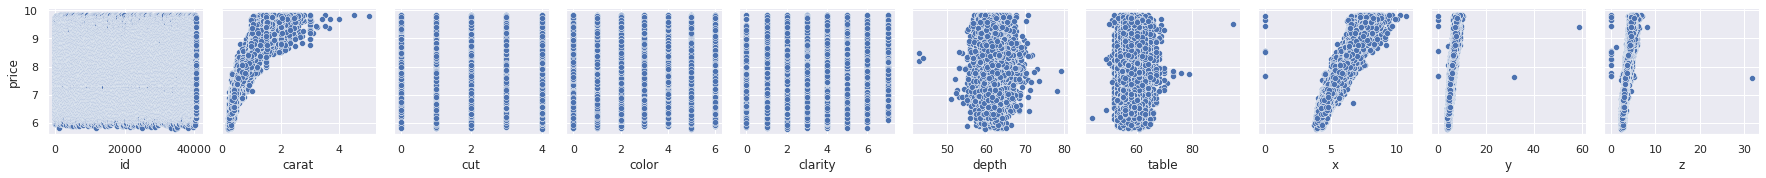

In [4]:
sns.set(rc={'figure.figsize':(20,10)})
sns.pairplot(data=train, y_vars='price', x_vars=train.drop(columns='price'))

Lastly, after crosvalidating many, many models, I reached three promising regressors: XGradientBoosting, RandomForest and HistGradientBoosting. First, I cross validated all of them and then used RandomSearchCV to optimize their parameters (I used hyperopt for XGBR). Then, I used PolinomialFeatures to get all polinomial combinations of the training data variables and finally, predicted an outcome of the test data with all of them.

Since these three worked like a charm, I used the VotingRegressor to get the mean of their predictions. In the end the most I got was 0.08404 of root mean squared error.

I tried to plot the predictions to see any patterns, but the all look like this:

In [6]:
once = pd.read_csv('data/test11_mean_best_3.csv')

<AxesSubplot:ylabel='price'>

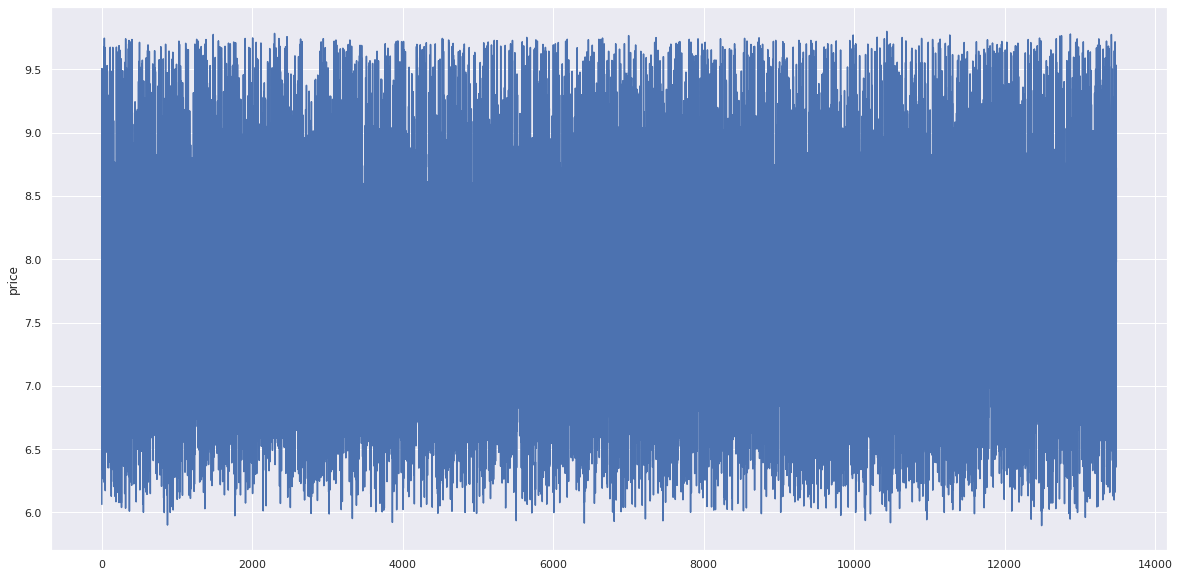

In [8]:
sns.lineplot(data=once['price'])

Nothing to conclude from that.

Best parameters for XGBR: 
- 'learning_rate': 0.04029264786337595
- 'n_estimators': 500.0
- 'x_gamma': 0.14396489384644895

Best parameters for RFR: 
- max_depth=20
- min_samples_split=10
- n_estimators=250  

Best parameters for HGBR: 
- learning_rate=0.03
- max_depth=20
- max_iter=200
- max_leaf_nodes=None